# Dicoding - Project Analisis Data dengan Python
- **Nama**: Nathan Garzya Santoso
- **Email**: dev.nathangarzyasantoso@gmail.com
- **ID Dicoding**: nathgrz

# Menentukan Pertanyaan Bisnis
- 5 Produk apa saja yang sering dan jarang dibeli?
- Berapa tingkat kepuasan pelanggan terhadap pelayana e-commerce?
- Bagaimana performa penjualan tiap bulannya?
- Bagaimana performa pendapatan tiap bulannya?
- Bagaimana distribusi pelanggan berdasarkan RFM

# Import Libraries

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from datetime import datetime
from unidecode import unidecode

# Data Wrangling

## Gathering Data

### Customers

In [100]:
customers_df = pd.read_csv('data/E-Commerce Public Dataset/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Geolocation

In [101]:
geolocation_df = pd.read_csv('data/E-Commerce Public Dataset/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Order Items

In [102]:
order_items_df = pd.read_csv('data/E-Commerce Public Dataset/order_items_dataset.csv')
order_items_df.head()

,order_id,product_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,1,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,1,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,1,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,1,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Order Payment

In [103]:
order_payments_df = pd.read_csv('data/E-Commerce Public Dataset/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Order Reviews

In [104]:
order_reviews_df = pd.read_csv('data/E-Commerce Public Dataset/order_reviews_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Orders

In [105]:
orders_df = pd.read_csv('data/E-Commerce Public Dataset/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Product Categories

In [106]:
product_categories_df = pd.read_csv('data/E-Commerce Public Dataset/product_category_name_translation.csv')
product_categories_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Products

In [107]:
products_df = pd.read_csv('data/E-Commerce Public Dataset/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Sellers

In [108]:
sellers_df = pd.read_csv('data/E-Commerce Public Dataset/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## Assessing Data

### Customers

In [109]:
customers_df.info()
print(f"\nJumlah duplikasi: {customers_df.duplicated().sum()}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Jumlah duplikasi: 0



Berdasarkan hasil di atas, data **customers** tidak memiliki *missing* value dan duplikasi data

In [110]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Hasil di atas tidak memiliki makna apapun, dikarenakan dataset **customers** hanya berisi ID, kode pos, kota, dan negara sehingga hasil *descriptive statistics* di atas tidak memiliki makna.

### Geolocation

In [111]:
geolocation_df.info()
print(f"\nJumlah duplikasi data: {geolocation_df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB

Jumlah duplikasi data: 261831


Berdasarkan hasil di atas, dataset **geolocation** memiliki data yang terduplikasi sebanyak **261831** data.

In [112]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [113]:
geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [114]:
print(len(geolocation_df[geolocation_df["geolocation_city"] == "são paulo"]))
print(len(geolocation_df[geolocation_df["geolocation_city"] == "sao paulo"]))

24918
135800


Bisa dilihat di atas, bahwa pada kolom **geolocation_city** terdapat data yang memiliki format jelek / tidak standar. Kita akan mengubahnya menjadi format yang standar

### Order Items

In [115]:
order_items_df.info()
print(f"\nJumlah duplikasi data: {order_items_df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   product_id           112650 non-null  object 
 2   order_item_id        112650 non-null  int64  
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

Jumlah duplikasi data: 0


Berdasarkan hasil di atas, dataset **order items** tidak memiliki *missing value* dan duplikasi data, tetapi pada kolom **shipping_limit_date** seharusnya bertipe **datetime**.

In [116]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### Order Payments

In [117]:
order_payments_df.info()
print(f"Jumlah duplikasi data: {order_payments_df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
Jumlah duplikasi data: 0


Berdasarkan hasil di atas, dataset **order payments** tidak memiliki *missing value** dan duplikasi data

In [118]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Berdasarkan hasil di atas terdapat beberapa hal:
1. **nilai pembelian terbesar** adalah 13664 BRL (Brazilian Real)
2. cicilan **terbanyak** sebanyak **29 kali**

### Order Reviews

In [119]:
order_reviews_df.info()
print(f"Jumlah duplikasi data: {order_reviews_df.duplicated().sum()}")
order_reviews_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
Jumlah duplikasi data: 0


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Berdasarkan hasil di atas, terdapat beberapa hal:
1. pada kolom **review_comment_title** dan **review_comment_message** terdapat masing - masing **87656** dan **58247** data yang tidak ada.
2. kolom **review_creation_date** dan **review_answer_timestamp** seharusnya bertipe datetime.

In [120]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### Orders

In [121]:
orders_df.info()
print(f"Jumlah duplikasi data: {orders_df.duplicated().sum()}")
orders_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Jumlah duplikasi data: 0


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Berdasarkan hasil di atas, terdapat beberapa hal:
1. untuk kolom **order_purchase_timestamp**, **order_approved_at**, **order_delivered_carrier_date**, **order_delivered_customer_date**, dan **order_estimated_delivery_date** seharusnya bertipe **datetime**
2. Terdapat 3 kolom, yaitu **order_approved_at**, **order_delivered_carrier_date**, dan **order_delivered_customer_date** yang memiliki *missing value*. Untuk ketiga kolom ini tidak akan di-*drop* dikarenakan bisa menghilangkan keterangan data yang penting.

In [122]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### Product Categories

In [123]:
product_categories_df.info()
print(f"Jumlah duplikasi data: {product_categories_df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
Jumlah duplikasi data: 0


Berdasarkan data di atas, dateset **product category** tidak memiliki *missing value* dan duplikasi data

### Products

In [124]:
products_df.info()
print(f"Jumlah duplikasi data: {products_df.duplicated().sum()}")
products_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Jumlah duplikasi data: 0


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Berdasarkan data di atas, semua kolom kecuali **product_id** memiliki *missing value*. Tidak di-*drop* karena bisa kehilangan keterangan yang penting.

In [125]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### Sellers

In [126]:
sellers_df.info()
print(f"Jumlah duplikasi data: {sellers_df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
Jumlah duplikasi data: 0


Berdasarkan hasil di atas, dateset **sellers** tidak memiliki *missing value* dan duplikasi data

## Cleaning Data

### Geolocation

In [127]:
print(f"Before: {geolocation_df.duplicated().sum()}")
geolocation_df.drop_duplicates(inplace=True)
print(f"After: {geolocation_df.duplicated().sum()}")

Before: 261831
After: 0


### Order Items

Ubah kolom **shipping_limit_date** bertipe **datetime**

In [128]:
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   product_id           112650 non-null  object        
 2   order_item_id        112650 non-null  int64         
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Ubah format data menjadi **standar**

In [129]:
geolocation_df['geolocation_city'] = geolocation_df['geolocation_city'].apply(lambda city: unidecode(city))

In [130]:
print(len(geolocation_df[geolocation_df["geolocation_city"] == "são paulo"]))
print(len(geolocation_df[geolocation_df["geolocation_city"] == "sao paulo"]))

0
99645


### Order Reviews

Ubah nilai pada kolom **review_comment_title** dan **review_comment_message** yang bernilai **NaN** menjadi **No Title** dan **No Message**.

In [131]:
order_reviews_df["review_comment_title"].fillna("No Title", inplace=True)
order_reviews_df["review_comment_message"].fillna("No Message", inplace=True)

In [132]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Ubah kolom **review_creation_date** dan **review_answer_timestamp** bertipe **datetime**

In [133]:
columns = ['review_creation_date', 'review_answer_timestamp']

for col in columns:
    order_reviews_df[col] = pd.to_datetime(order_reviews_df[col])

In [134]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


### Orders

Ubah kolom **order_purchase_timestamp**, **order_approved_at**, **order_delivered_carrier_date**, **order_delivered_customer_date**, dan **order_estimated_delivery_date** bertipe **datetime**

In [135]:
columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for col in columns:
    orders_df[col] = pd.to_datetime(orders_df[col])

In [136]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


# Exploratory Data Analysis (EDA)

## Customers

In [137]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [138]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Bisa dilihat bahwa, kolom **customer_id** memiliki jumlah *unique* yang sama dengan jumlah data, artinya setiap pelanggan memiliki **identifier** masing - masing

In [139]:
customer_count = customers_df.groupby(by="customer_city")['customer_id'].nunique().sort_values(ascending=False).reset_index()

In [140]:
customer_count.head(5)

,customer_city,customer_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521


In [141]:
customer_count[customer_count['customer_id'] == 1]

,customer_city,customer_id
2975,acucena,1
2976,sao nicolau,1
2977,alexandrita,1
2978,sao miguel do cambui,1
2979,trabiju,1
...,...,...
4114,ibiara,1
4115,rio espera,1
4116,rio dos indios,1
4117,rio dos cedros,1


Berdasarkan hasil di atas:
1. kota **sao paulo** merupakan kota yang memiliki jumlah pelanggan **terbanyak** sebesar **15540 pelanggan**. 
2. terdapat **1144** kota yang memiliki jumlah pelanggan berjumlah **1 pelanggan** saja.

## Order Items

In [142]:
order_items_df.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405


## Order Payments

In [143]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Berdasarkan hasil di atas:
1. Nilai transaksi terbesar pada satu kali pembayaran yaitu **13664.08** Brazilian Real.
2. Tedapat transaksi untuk cicilan ke-**29**

In [144]:
order_payments_df.groupby(by="payment_type")['order_id'].size().sort_values(ascending=False).reset_index()

,payment_type,order_id
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


Berdasarkan hasil di atas, pembayaran dengan **_credit card_** banyak digunakan oleh pelanggan.

In [145]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [146]:
orders_df.groupby(by="order_status")['order_id'].size().sort_values(ascending=False).reset_index()

,order_status,order_id
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


Berdasarkan hasil di atas, **96478** dari 99441 order sudah **dikirimkan** ke pelanggan. Sedangkan **625** dari 99441 order **dibatalkan**.

## Data Customers dan Orders

In [147]:
customer_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

customer_orders_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05


## Data Products dan Product Categories

In [148]:
product_with_categories_df = pd.merge(
    left=products_df,
    right=product_categories_df,
    how='left',
    left_on="product_category_name",
    right_on="product_category_name"
)
product_with_categories_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


## Data Customer Orders dan Payments 

In [149]:
cust_order_payments_df = pd.merge(
    left=customer_orders_df,
    right=order_payments_df,
    how='left',
    left_on="order_id",
    right_on="order_id"
)
cust_order_payments_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
52150,a988ea25d99e3bf1cb59a94c3450bdb2,a0b5c0d19b4f543e7d64912aadc96424,15915,aparecida de monte alto,SP,617700c0f437adbb60d8ab8ea6d9e3ab,delivered,2018-08-02 21:51:19,2018-08-02 22:24:14,2018-08-03 14:10:00,2018-08-14 23:17:28,2018-08-17,1.0,credit_card,5.0,199.26
68201,5c220bc37df60715575a60d3ec7b72a0,62371bf5bdb7ee1574e7276529e792c7,5684,sao paulo,SP,136c6d8d429f92dcbc6876d47eb61b05,delivered,2018-05-10 11:32:29,2018-05-11 03:10:34,2018-05-11 15:03:00,2018-05-14 17:36:57,2018-05-23,1.0,boleto,1.0,74.31
14656,05a7b3e0ed7ab2ffe65411141fe27234,88960be7068e1dd21ac6e59aab6315ef,38706,patos de minas,MG,2a952f9ea7fad0c8238967a2c4df72b8,delivered,2018-02-24 07:55:10,2018-02-27 04:31:19,2018-02-27 23:52:49,2018-03-28 18:46:24,2018-03-21,1.0,boleto,1.0,28.00
17547,d35a516e27873b344b2b9bc4ff2634a1,3e71464fee3e76cd5cabe7fdea4970fd,40150,salvador,BA,078c97da8566e6052ff4f0925dadcbb4,delivered,2018-01-27 10:45:45,2018-01-27 10:57:19,2018-01-29 18:58:54,2018-02-22 18:51:39,2018-02-23,1.0,credit_card,3.0,53.78
69190,0f574bf27462cb2edf5873c751701344,9fb0610d1653672a993efe94f2eeb896,7950,francisco morato,SP,be06d9f698d7e74899f4cf223ae62995,delivered,2017-08-07 11:29:18,2017-08-07 11:45:24,2017-08-08 17:43:42,2017-08-18 18:57:04,2017-08-18,1.0,credit_card,1.0,113.15


## Data Customer Order Payments dan Order Items

In [150]:
all_df = pd.merge(
    left=cust_order_payments_df,
    right=order_items_df,
    how='left',
    left_on="order_id",
    right_on="order_id"
)

all_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,product_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
61195,57cf34cd1fbe463134f112c074dfcfdb,4d2d3973dce07b7a6dc7cea179e8769e,20030,rio de janeiro,RJ,4140fb83a84c614859497ddf5333334f,delivered,2017-07-13 15:27:00,2017-07-13 15:44:27,2017-07-19 20:39:00,...,1.0,credit_card,2.0,42.50,b09790edda54333116f9cf1decc580a1,1.0,d2374cbcbb3ca4ab1086534108cc3ab7,2017-07-19 15:44:27,27.4,15.10
58176,e0cd956b5c6d7ca73cf45c57fdb4e985,f55c9c0dc7092a0391b0b0913ecd827e,30421,belo horizonte,MG,b58613b6198d11176ee50ef1d433bfbd,delivered,2018-07-17 17:42:27,2018-07-18 02:41:44,2018-07-31 14:34:00,...,1.0,boleto,1.0,42.19,3fc3d637781e5d185455013606a6e2cd,1.0,bf00385a5f7fc1ef39a13c2e9ee50a5f,2018-07-24 02:41:44,26.9,15.29
83653,55e24d33ade77f949c22b6e008801c15,71d99240b28b20f7b0d9046d9ff6cbe6,2378,sao paulo,SP,0115abf6b892040abfdd5bdfcb6b2c51,delivered,2017-04-20 12:32:37,2017-04-21 05:10:46,2017-04-26 19:15:29,...,1.0,boleto,1.0,207.98,dc2410804cf782c5d87dbcd201b74e9b,1.0,897060da8b9a21f655304d50fd935913,2017-04-27 05:10:46,196.0,11.98
100130,8e98bf676f11db9fd078edd4d3dad51c,ada34b99e77d7427f903b45fdf1d3772,72620,brasilia,DF,0a8758ec6f399b52f2ecb7b1a0c4c16c,delivered,2017-11-25 17:33:04,2017-11-25 17:53:04,2017-11-29 21:05:01,...,1.0,credit_card,3.0,66.67,389d119b48cf3043d311335e499d9c6b,1.0,1f50f920176fa81dab994f9023523100,2017-11-30 17:53:04,49.0,17.67
71108,87e60e619ad3ef385afa955728751bf9,cd6a3ef6de776069189d6ea75ed51945,80240,curitiba,PR,ca56cc083a7aeed15fdfd437874cd0e3,delivered,2018-08-13 17:36:48,2018-08-13 17:50:24,2018-08-17 07:27:00,...,1.0,credit_card,1.0,110.47,adb5b8ee8b86e86930bc333c182bbead,1.0,e9bc59e7b60fc3063eb2290deda4cced,2018-08-24 17:50:24,95.5,14.97


## Data Customer Order Payments Order Items dan Product_Category

In [151]:
all_df = pd.merge(
    left=all_df,
    right=product_with_categories_df,
    how='left',
    left_on="product_id",
    right_on="product_id"
)

all_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
79803,92b4a5ec884cb9c319b6daed5d1436c3,ad217432b3b82f899d06dca77f489c2a,89520,curitibanos,SC,3ee2cb486f75ff2899da20d9bec72017,delivered,2018-02-24 19:01:20,2018-02-26 14:10:38,2018-02-28 23:39:48,...,15.10,telefonia,58.0,777.0,6.0,300.0,17.0,4.0,12.0,telephony
20824,1fab691c0fb4a038875b2876180007bf,8663d059e175bdf137aafb13fc1e6a7e,21320,rio de janeiro,RJ,7a2305c60573b7af60dd941db4629ec7,delivered,2017-04-06 21:02:05,2017-04-06 21:15:10,2017-04-13 17:17:43,...,31.93,moveis_escritorio,53.0,1199.0,1.0,10975.0,53.0,51.0,18.0,office_furniture
32393,8ac127359066e3c863e6dedc2aef6364,10101a131c76b6e2e28b5856cf1cf736,21360,rio de janeiro,RJ,34a6104e0b5f529ec680406b6d8ba4ce,delivered,2017-06-29 06:36:24,2017-06-30 03:05:32,2017-07-03 15:53:27,...,15.79,livros_interesse_geral,41.0,499.0,2.0,200.0,20.0,10.0,30.0,books_general_interest
49020,612b779c8394301bc22771a63e4e7a0a,19f190b5d6d5121c8c6d2aecf2c7d98c,5791,sao paulo,SP,701346c966bac66c241f305dabd8f61d,delivered,2018-05-03 15:12:05,2018-05-03 15:34:52,2018-05-04 13:39:00,...,23.13,instrumentos_musicais,43.0,1283.0,5.0,1650.0,30.0,20.0,15.0,musical_instruments
50957,dea5d6374006a4aa182a73371da9f731,99411da41bbc717063cad61397ddf465,6154,osasco,SP,0e6844f9954c0a475641b6490c3f9739,delivered,2018-06-05 03:52:26,2018-06-05 16:55:41,2018-06-06 14:36:00,...,19.39,cama_mesa_banho,60.0,680.0,1.0,1275.0,19.0,17.0,23.0,bed_bath_table


## Data Customer Order Payments Order Items Product_Category dan Seller

In [152]:
all_df = pd.merge(
    left=all_df,
    right=sellers_df,
    how='left',
    left_on="seller_id",
    right_on="seller_id"
)

all_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
111183,d69da957a458e242fc8c659738ce35a1,d59fdb68e15db938458f203e91613f79,1321,sao paulo,SP,b721972cedcd805cf76991c48731eca7,delivered,2017-08-26 11:46:08,2017-08-26 12:04:52,2017-08-28 21:24:33,...,790.0,4.0,800.0,20.0,7.0,20.0,health_beauty,86050.0,londrina,PR
16994,2200048a1b17ccf0499a93d1e17d7c57,735d2f09948cabbdb942958b1f94debd,74180,goiania,GO,d4a72eff3bfdb6ff7667bef4119283e9,delivered,2018-07-04 00:22:00,2018-07-05 16:24:48,2018-07-04 13:09:00,...,246.0,1.0,1025.0,35.0,10.0,18.0,bed_bath_table,14940.0,ibitinga,SP
65805,99e92a4ae3b87639d2b55ee0319dee00,964eb1b98713e4527eb11bce9a0ac1fe,1008,sao paulo,SP,f644bc7cdc4cf0854f50017d5ccfff50,delivered,2018-08-09 10:54:00,2018-08-09 15:25:22,2018-08-10 15:05:00,...,1683.0,8.0,2700.0,46.0,16.0,25.0,auto,6056.0,osasco,SP
14996,863e3a165607322347d4d4d2f051d519,37e86a77329c08569629e718cda02cbd,72726,brasilia,DF,a26bdfa860437e3b9199a81b6003d928,delivered,2018-07-31 07:37:42,2018-07-31 07:50:12,2018-07-31 16:26:00,...,663.0,3.0,1150.0,27.0,6.0,26.0,baby,14940.0,ibitinga,SP
105660,743c0a31efdac563c043641dcdb8173b,8312dbf53cccf98b7541b21ebeecc0a2,23815,itaguai,RJ,2fa183e49c2092ebf306bfd2f6ce9378,delivered,2018-05-06 19:51:35,2018-05-07 09:56:12,2018-05-08 11:42:00,...,96.0,1.0,11375.0,55.0,19.0,33.0,home_appliances_2,25963.0,teresopolis,RJ


## Data Customer Order Payments Order Items Product_Category Seller dan Review

In [153]:
all_df = pd.merge(
    left=all_df,
    right=order_reviews_df,
    how='left',
    left_on="order_id",
    right_on="order_id"
)

all_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
30092,a99b2128d3db96e838381fe6042cdee6,311b7759da40d8d24724a882f0641308,74460,goiania,GO,a7d73128b7dc2644c342e7495ebe8e3f,delivered,2018-04-05 15:59:54,2018-04-05 16:11:03,2018-04-10 23:37:43,...,watches_gifts,14050.0,ribeirao preto,SP,81ed2023b3dd23a2e0e762cad1617d93,4.0,No Title,No Message,2018-05-01,2018-05-02 16:08:31
102962,300f546c25d3587ad236a4d732c8031c,803911f2e60553ddd6c785a6bfa4460f,5663,sao paulo,SP,56c52d234b22892f3821750d97e57052,delivered,2017-11-25 14:02:49,2017-11-25 14:17:45,2017-11-30 16:59:08,...,housewares,13920.0,pedreira,SP,f2f2aa7365217186a600c810b669a582,3.0,No Title,Bom,2017-12-07,2017-12-07 19:44:20
106302,ec133927f79d0d8ae1936711d7b44dde,432c8bda4f47f4131605f8edbaf3c6fb,42850,dias d'avila,BA,ae97d3198a682804e9f5bfacfe13355a,delivered,2017-10-25 19:48:02,2017-10-26 20:55:44,2017-10-27 22:43:50,...,toys,22240.0,rio de janeiro,RJ,6a86b5db4099ae61d2f4f7105e7b1b0d,5.0,No Title,No Message,2017-11-14,2017-11-18 00:56:54
103221,489d6e5705b34ec43cbe7cc16344a45d,12c618501e009d459cc177de818798d0,28860,casimiro de abreu,RJ,0f7a031ff7235289c8ce7270cac7c4ec,delivered,2018-02-21 08:54:02,2018-02-23 02:10:46,2018-02-28 21:23:36,...,market_place,6162.0,osasco,SP,a49eb28138df5c6167c602258f8ede3c,1.0,No Title,No Message,2018-03-22,2018-03-26 15:23:48
57119,1543296f2174f93ccda002c8d0962ebd,8cecf15f8c5e54a01067d86434735227,26262,nova iguacu,RJ,ed697c56bd912fb0016d4a090aa10b2d,delivered,2018-01-29 16:16:23,2018-01-29 16:36:59,2018-01-31 22:45:07,...,furniture_decor,38405.0,uberlandia,MG,5a66f1822a0c858cdf617c787f7ca406,4.0,No Title,"Adorei as peças, são exatamente como na foto. ...",2018-02-07,2018-02-09 23:37:50


In [154]:
all_df.describe()

,customer_zip_code_prefix,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_installments,payment_value,order_item_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,review_score,review_creation_date,review_answer_timestamp
count,119143.000000,119143,118966,117057,115722,119143,119140.000000,119140.000000,119140.000000,118310.000000,...,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,118310.000000,118146.000000,118146,118146
mean,35033.451298,2017-12-29 18:36:13.115760384,2017-12-30 04:49:18.425726720,2018-01-03 08:24:34.395525376,2018-01-12 20:55:38.199616256,2018-01-22 15:21:10.241642496,1.094737,2.941246,172.735135,1.196543,...,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,24442.410413,4.015582,2018-01-11 13:17:50.103092736,2018-01-14 17:00:35.769302528
min,1003.000000,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,1.000000,0.000000,0.000000,1.000000,...,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,11250.000000,2017-09-10 20:15:46,2017-09-11 15:50:48.500000,2017-09-14 19:52:12,2017-09-22 21:54:31.249999872,2017-10-02 00:00:00,1.000000,1.000000,60.850000,1.000000,...,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,4.000000,2017-09-22 00:00:00,2017-09-25 11:15:40.750000128
50%,24240.000000,2018-01-17 11:59:12,2018-01-17 16:49:49,2018-01-23 17:03:08,2018-02-01 03:17:55,2018-02-14 00:00:00,1.000000,2.000000,108.160000,1.000000,...,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000,5.000000,2018-02-01 00:00:00,2018-02-03 12:04:23
75%,58475.000000,2018-05-03 13:18:30,2018-05-03 16:56:53,2018-05-07 14:57:00,2018-05-15 00:08:31.500000,2018-05-25 00:00:00,1.000000,4.000000,189.240000,1.000000,...,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,27972.000000,5.000000,2018-05-15 00:00:00,2018-05-17 10:48:59
max,99990.000000,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,29.000000,24.000000,13664.080000,21.000000,...,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35
std,29823.198969,NaN,NaN,NaN,NaN,NaN,0.730141,2.777848,267.776077,0.699489,...,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,27573.004511,1.400436,NaN,NaN


### 5 Pelanggan yang paling banyak melakukan transaksi

In [155]:
all_df["customer_state"].unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

In [156]:
all_df.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "price": "sum"
}).sort_values(by="price", ascending=False)

price
customer_state product_category_name_english           
SP             bed_bath_table                 509313.30
               health_beauty                  475928.29
               watches_gifts                  450822.51
               sports_leisure                 403732.12
               computers_accessories          360210.34
...                                                 ...
AL             drinks                             15.49
BA             home_comfort_2                     12.90
ES             home_comfort_2                     12.90
PR             home_comfort_2                     12.90
MS             costruction_tools_tools             6.80

[1356 rows x 1 columns]

# Visualization & Explanatory Analysis

## 1. 5 Produk apa saja yang sering dan jarang dibeli?

In [157]:
sum_order_items_df = all_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique"
}).sort_values(by="order_id", ascending=False).reset_index()
sum_order_items_df.head()

,product_category_name_english,order_id
0,bed_bath_table,9417
1,health_beauty,8836
2,sports_leisure,7720
3,computers_accessories,6689
4,furniture_decor,6449


C:\Users\Nathan Garzya\AppData\Local\Temp\ipykernel_25376\3013463007.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Nathan Garzya\AppData\Local\Temp\ipykernel_25376\3013463007.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


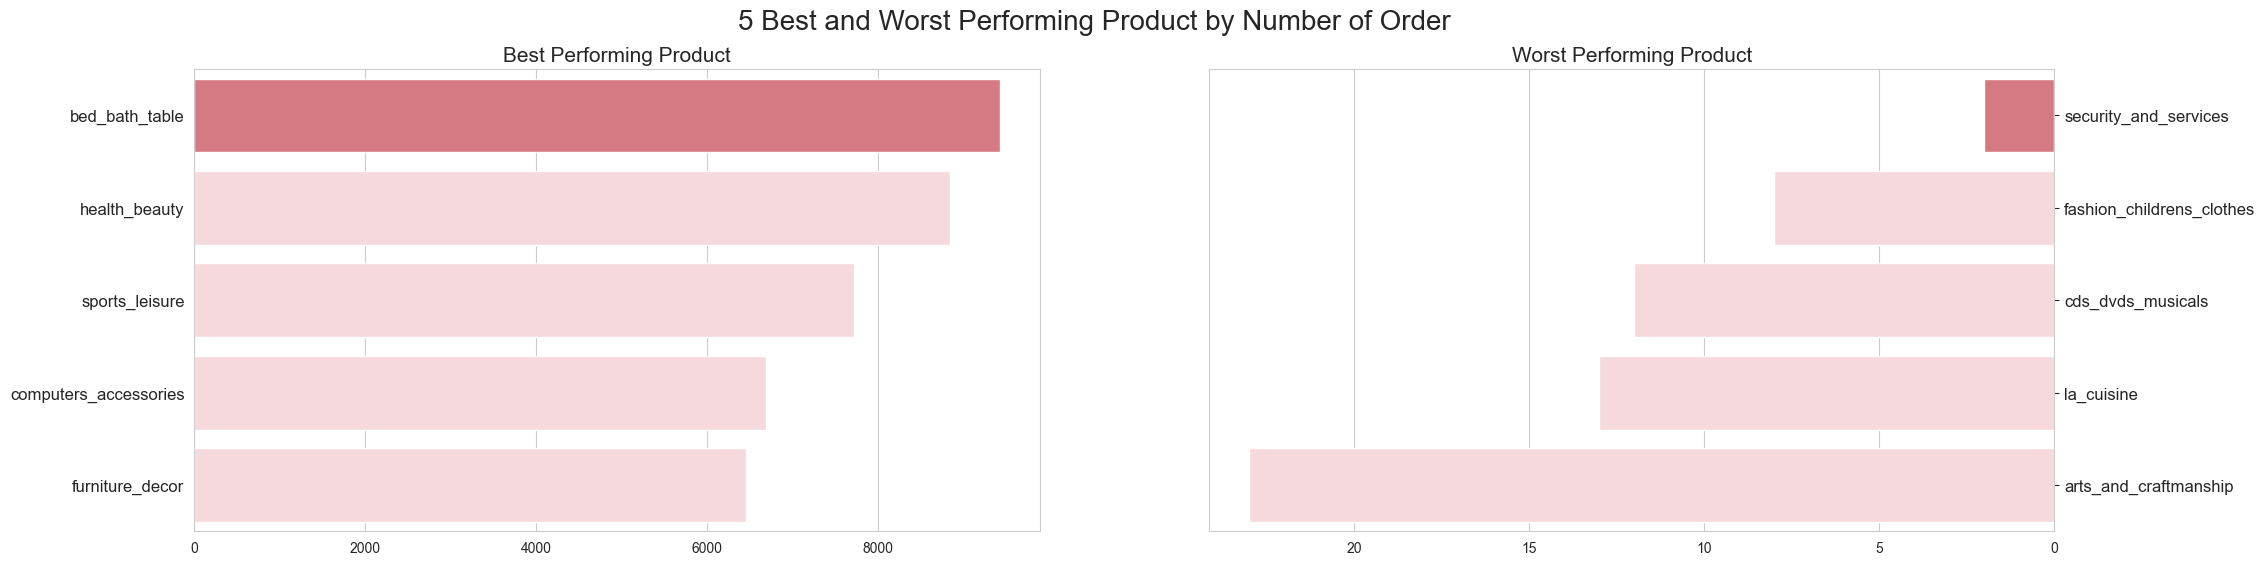

In [158]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#E46A76", "#FAD4D8", "#FAD4D8", "#FAD4D8", "#FAD4D8"]

sns.barplot(
    x="order_id",
    y="product_category_name_english",
    data=sum_order_items_df.head(5),
    palette=colors,
    ax=ax[0]
)

ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis="y", labelsize=12)

sns.barplot(
    x="order_id",
    y="product_category_name_english",
    data=sum_order_items_df.sort_values(by="order_id", ascending=True).head(5),
    palette=colors,
    ax=ax[1]
)

ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis="y", labelsize=12)

plt.suptitle("5 Best and Worst Performing Product by Number of Order", fontsize=20)
plt.show()

Berdasarkan grafik di atas, produk **bed_bath_table** memiliki jumlah penjualan terbesar. Sedangkan produk **security_and_Services** memiliki jumlah penjualan terkecil.

## 2. Berapa tingkat kepuasan pelanggan terhadap pelayanan E-Commerce

C:\Users\Nathan Garzya\AppData\Local\Temp\ipykernel_25376\3479918832.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


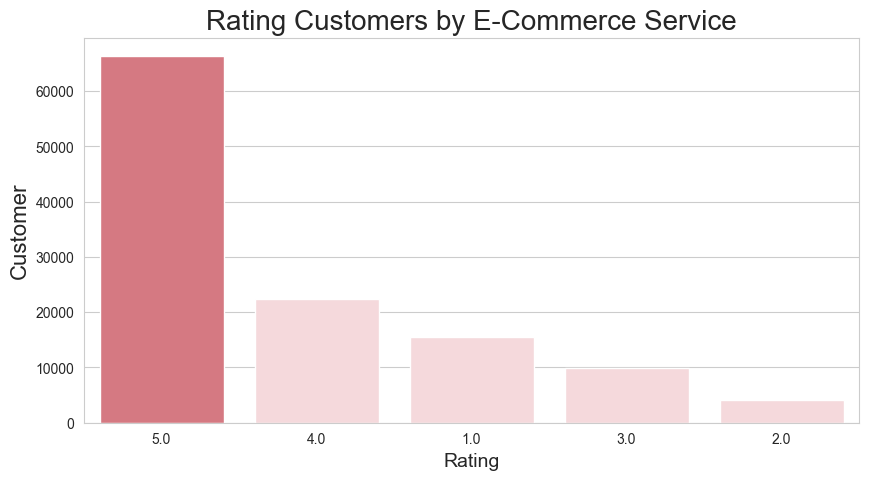

In [159]:
ratings = all_df['review_score'].value_counts().sort_values(ascending=False)
max_ratings = ratings.idxmax()
colors = ["#FAD4D8", "#FAD4D8", "#E46A76", "#FAD4D8", "#FAD4D8"]
plt.figure(figsize=(10, 5))

sns.barplot(
    x=ratings.index,
    y=ratings.values,
    palette=['#E46A76' if score == max_ratings else "#FAD4D8" for score in ratings.index],
    order=ratings.index
)

plt.title("Rating Customers by E-Commerce Service", loc="center", fontsize=20)
plt.ylabel("Customer", fontsize=16)
plt.xlabel("Rating", fontsize=14)
plt.show()

Berdasarkan grafik di atas, dapat dilihat bahwa mayoritas pelanggan memberikan rating sebesar **5**. Bisa di lihat juga, bahwa rating *5* memiliki jumlah yang **lebih besar** dibandingkan total jumlah rating 1 sampai 4.

## 3. Bagaimana performa penjualan tiap bulannya

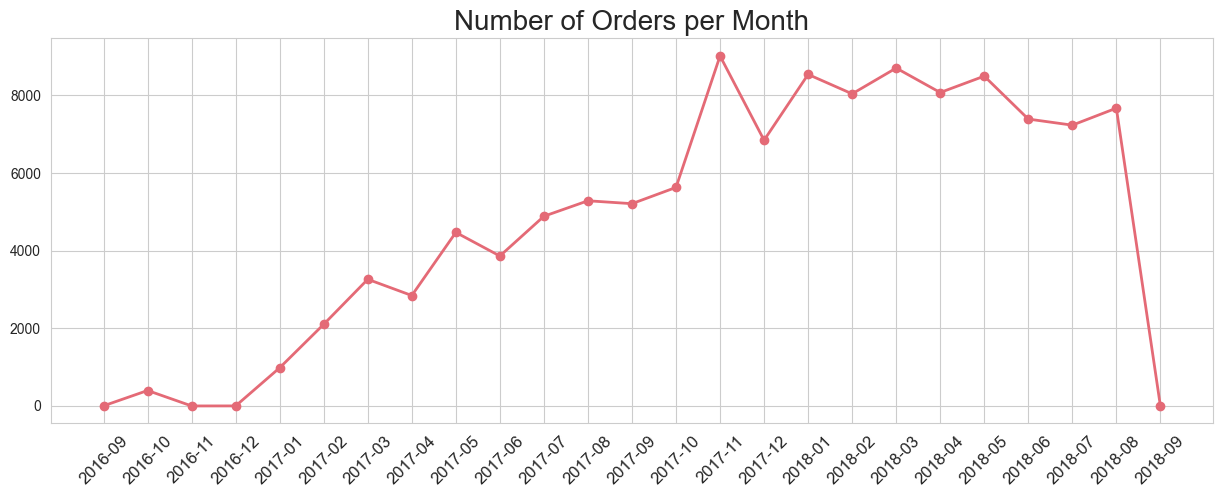

In [160]:
monthly_orders_df = all_df.resample(rule='M', on='order_approved_at').agg({
    "order_id": "size",
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df.reset_index(inplace=True)
monthly_orders_df.rename(columns={"order_id": "order_count"}, inplace=True)
plt.figure(figsize=(15, 5))
plt.plot(
    monthly_orders_df["order_approved_at"],
    monthly_orders_df["order_count"],
    marker='o',
    linewidth=2,
    color="#E46A76"
)
plt.title("Number of Orders per Month", loc="center", fontsize=20)
plt.xticks(fontsize=12)
plt.xlabel("", labelpad=10)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.show()

Berdasarkan grafik di atas, terdapat beberapa *insight*:
1. Pada bulan 12 tahun 2016 sampai dengan bulan 11 tahun 2017, jumlah penjualan mengalami kenaikan yang konstan, walaupun di beberapa bulan sempat mengalami penurunan tetapi di bulan berikutnya mengalami kenaikan.
2. Jumlah penjualan terbesar berada pada bulan 11 tahun 2017.
3. Penjualan mengalami penurunan yang sangat signifikan pada bulan 8 ke bulan 9 tahun 2018.

## 4. Bagaimana performa pendapatan tiap bulannya?

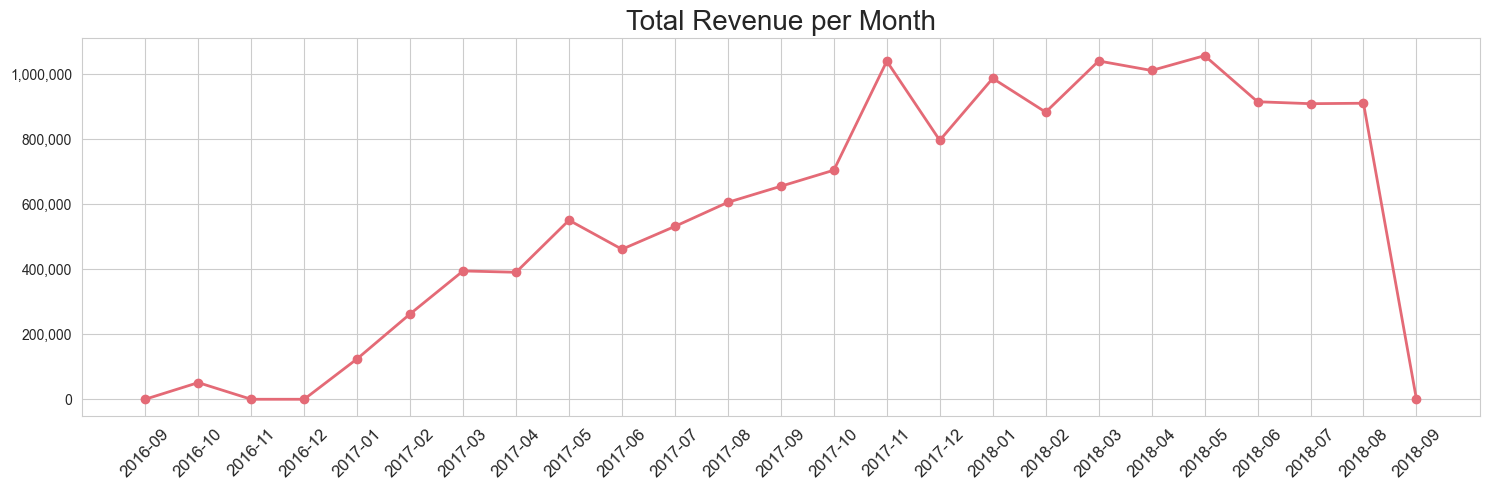

In [161]:
monthly_revenue_df = all_df.resample(rule='M', on='order_approved_at').agg({
    "price": "sum",
})

monthly_revenue_df.index = monthly_revenue_df.index.strftime('%Y-%m')
monthly_revenue_df.reset_index(inplace=True)
monthly_revenue_df.rename(columns={"price": "revenue"}, inplace=True)

plt.figure(figsize=(15, 5))
plt.plot(
    monthly_revenue_df["order_approved_at"],
    monthly_revenue_df["revenue"],
    marker='o',
    linewidth=2,
    color="#E46A76"
)

plt.title("Total Revenue per Month", loc="center", fontsize=20)
plt.xticks(fontsize=12)
plt.xlabel("", labelpad=10)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, terdapat beberapa *insight*:
1. Pada bulan 12 tahun 2016 sampai dengan bulan 11 tahun 2017, jumlah pendapatan mengalami kenaikan yang konstan, walaupun di beberapa bulan sempat mengalami penurunan tetapi di bulan berikutnya mengalami kenaikan.
2. Jumlah pendapatan terbesar berada pada bulan 11 tahun 2017.
3. Pendapatan mengalami penurunan yang sangat signifikan pada bulan 8 ke bulan 9 tahun 2018.

Bisa dilihat bahwa grafik penjualan dan pendapatan memiliki karakteristik yang sama, artinya penjualan **berbanding lurus** dengan pendapatan.

# Analisis Lanjutan

## 5. Bagaimana distribusi pelanggan berdasarkan RFM

## RFM

In [162]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": 'max',
    'order_id': 'size',
    'price': 'sum'
})

rfm_df.columns = ['customer_id', 'max_order_timestamp', 'frequency', 'monetary']

rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.sample(10)
# rfm.columns = ["customer_id", ""]

,customer_id,frequency,monetary,recency
74150,be32bd080b6202c0024e3065140711aa,2,139.80,512
94535,f2efdcd71b76cfbb70c85f07a1c26144,1,7.29,545
56517,91bb67066c8638f483d7e2e5e277389f,1,45.90,474
86611,de8ab444bbafe90954b80fd7187a2821,1,24.00,93
90110,e77a1ae75eaa0ac5847dbc701aaa9f6d,1,0.00,447
27852,47cd45a6ac7b9fb16537df2ccffeb5ac,1,139.90,601
71429,b757d2bd2f607d861b8759e69e100c92,1,62.90,84
66195,aa2e9d6a786f96aaab74743384293503,2,599.98,334
21442,371800d440c7ea96d8757c42728e0032,2,78.00,73
31042,5008e2a68fe081931e75f999bc1e5a71,1,89.90,498


In [163]:
rfm_df.sort_values(by='frequency',ascending=False).head(5)

,customer_id,frequency,monetary,recency
15183,270c23a11d024a44c896d1894b261a83,63,2305.38,435
7586,13aa59158da63ba0e93ec6ac2c07aacb,38,3039.62,389
60184,9af2372a1e49340278e7c1ef8d749f34,29,11383.95,545
56942,92cd3ec6e2d643d4ebd0e3d6238f69e2,26,1299.74,497
81894,d22f25a9fadfb1abbc2e29395b1239f4,24,359.76,158


In [164]:
rfm_df

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337
1,000161a058600d5901f007fab4c27140,1,54.90,458
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427
4,000379cdec625522490c315e70c7a9fb,1,93.00,198
...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,3,164.70,202
99437,fffeda5b6d849fbd39689bb92087f431,1,47.90,148
99438,ffff42319e9b2d713724ae527742af25,1,199.90,126
99439,ffffa3172527f765de70084a7e53aae8,2,21.80,410


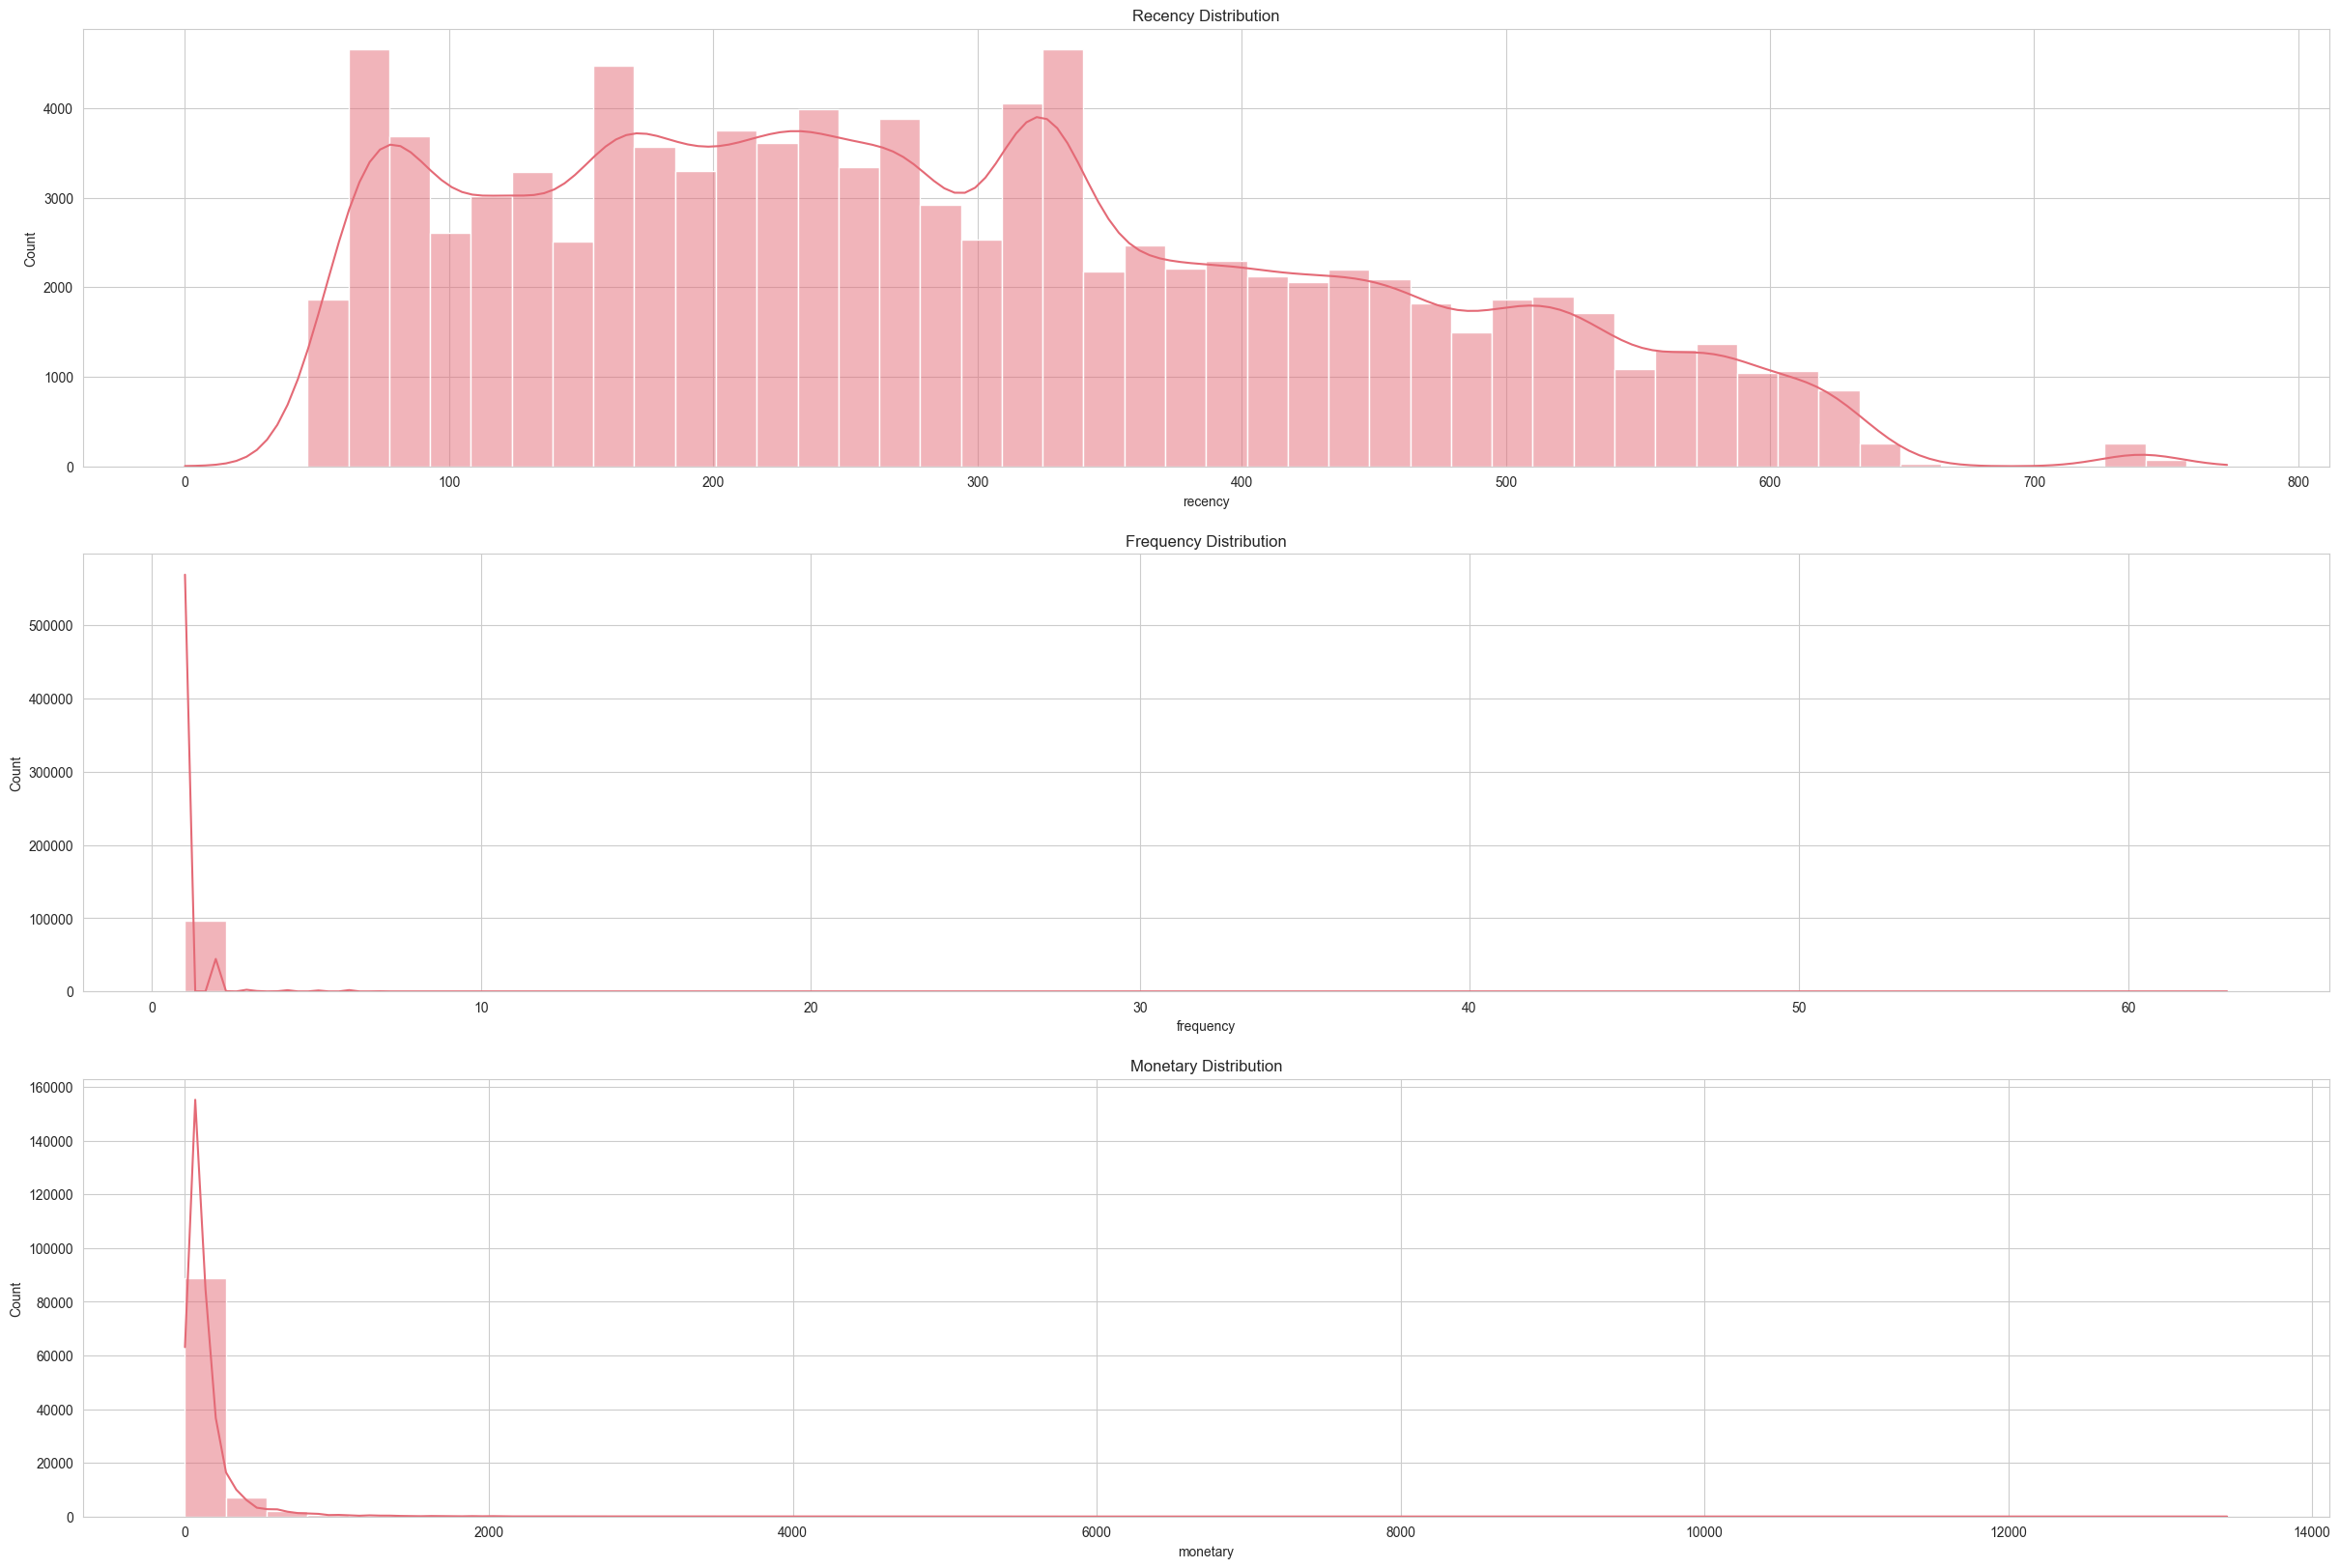

In [165]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(30, 20))

sns.histplot(
    rfm_df['recency'],
    bins=50,
    ax=ax[0],
    kde=True,
    color="#E46A76"
).set_title('Recency Distribution')

sns.histplot(
    rfm_df['frequency'],
    bins=50,
    ax=ax[1],
    kde=True,
    color="#E46A76"
).set_title('Frequency Distribution')

sns.histplot(
    rfm_df['monetary'],
    bins=50,
    ax=ax[2],
    kde=True,
    color="#E46A76"
).set_title('Monetary Distribution')

plt.show()

Berdasarkan 3 grafik distribusi di atas, terdapat beberapa hal:
1. Distribusi jumlah customer yang melakukan transaksi beberapa hari terakhir (<300) mengalami peningkatan.
2. Banyak pelanggan yang melakukan transaksi / pembelian hanya satu kali saja.
3. Banyak pelanggan yang mengeluarkan jumlah uang yang sedikit untuk pembelian, artinya memberikan pendapatan yang rendah ke perusahaan.

## Clustering

In [166]:
recency_score = rfm_df['recency'].rank(ascending=False)
frequency_score = rfm_df['frequency'].rank(ascending=False)
monetary_score = rfm_df['monetary'].rank(ascending=False)

monetary_score

0        49259.5
1        68189.5
2        19505.0
3        26101.0
4        46863.5
          ...   
99436    22856.0
99437    73888.0
99438    16460.5
99439    91966.0
99440    99054.0
Name: monetary, Length: 99441, dtype: float64

Normalisasi hasil score masing - masing kolom pada interval 0 sd 5

In [167]:
recency_score_norm = (recency_score - recency_score.min()) / (recency_score.max() - recency_score.min()) * 5
frequency_score_norm = (frequency_score - frequency_score.min()) / (frequency_score.max() - frequency_score.min()) * 5
monetary_score_norm = (monetary_score - monetary_score.min()) / (monetary_score.max() - monetary_score.min()) * 5

rfm_df['recency_score'] = recency_score_norm
rfm_df['frequency_score'] = frequency_score_norm
rfm_df['monetary_score'] = monetary_score_norm

Hitung RFM Score

In [168]:
rfm_score = (rfm_df['recency_score'] + rfm_df['frequency_score'] + rfm_df['monetary_score']) / 3
rfm_df['rfm_score'] = rfm_score

### Customer Segmentation

![Customer Segmentations](segmentations.png)

In [169]:
def customer_segmentation(df):
    if (df['rfm_score'] > 4.5):
        return "Champions"
    elif (df['rfm_score'] > 4):
        return "Potential Loyalist"
    elif (df['rfm_score'] > 3):
        return "Promising"
    elif (df['rfm_score'] > 2):
        return "About To Sleep"
    else:
        return "Lost"
    
rfm_df['customer_segmentation'] = rfm_df.apply(customer_segmentation, axis=1)
rfm_df.sample(5)

,customer_id,frequency,monetary,recency,recency_score,frequency_score,monetary_score,rfm_score,customer_segmentation
45880,766c2f70aa17fa444f29afb40ad857ef,1,149.99,217,3.148683,5.0,1.289310,3.145997,Promising
5107,0d3fdbd4697ff7426b3d0fbebafa60c1,1,179.99,189,3.470711,5.0,0.984523,3.151745,Promising
79885,ccf6e6ddd95c74ad8b2c92700001e658,1,86.98,347,1.641492,5.0,2.539852,3.060448,Promising
60802,9c865956bfff7e6fe7b54a92e545eb14,1,408.99,288,2.293116,5.0,0.267029,2.520048,About To Sleep
95330,f5215fbbc26bdb06f3474d90991abd26,1,118.58,520,0.485469,5.0,1.856153,2.447207,About To Sleep


In [170]:
customer_segments = rfm_df.groupby(by="customer_segmentation", as_index=False).agg({
    "customer_id": "nunique",
})
customer_segments

,customer_segmentation,customer_id
0,About To Sleep,26623
1,Champions,4396
2,Lost,11180
3,Potential Loyalist,12395
4,Promising,44847


C:\Users\Nathan Garzya\AppData\Local\Temp\ipykernel_25376\3138217554.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


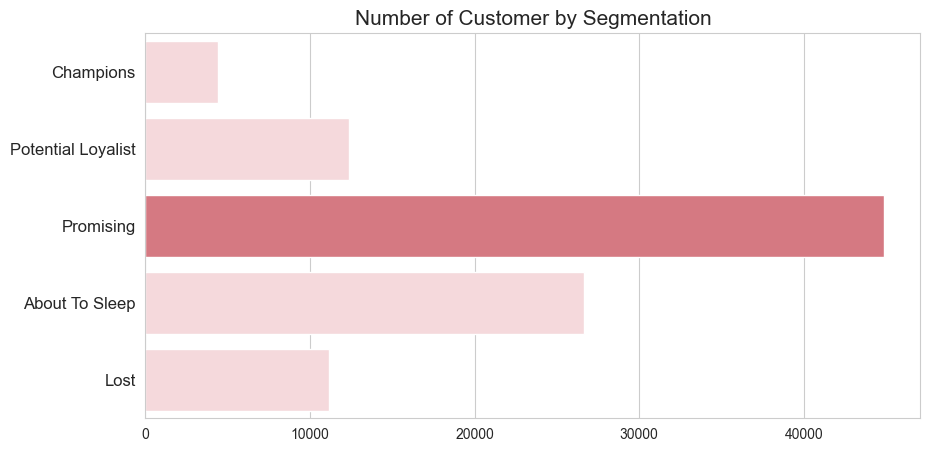

In [171]:
categories = ["Champions", "Potential Loyalist", "Promising", "About To Sleep", "Lost"]
# rfm_df['customer_segmentation'] = pd.Categorical(rfm_df['customer_segmentation'], categories)  # Ganti nanti, groupby dlu

customer_segments.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

customer_segments["customer_segmentation"] = pd.Categorical(customer_segments["customer_segmentation"], categories)
colors = ["#FAD4D8", "#FAD4D8", "#E46A76", "#FAD4D8", "#FAD4D8"]

plt.figure(figsize=(10, 5))
sns.barplot(
    x="customer_count",
    y="customer_segmentation",
    data=customer_segments.sort_values(by="customer_count", ascending=False),
    palette=colors
)

plt.title("Number of Customer by Segmentation", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Berdasarkan grafik di atas, pelanggan yang termasuk ke dalam kategori **Promising** memiliki jumlah lebih dari 40000 pelanggan. Sedangkan pelanggan yang termasuk ke dalam kategori **Champions** memiliki jumlah pelanggan yang paling sedikit.

# Conclusion

Dari total 71 produk yang ada, produk **bed_bath_table** merupakan produk yang memiliki total penjualan terbesar, yaitu **9417** order. Sedangkan produk yang berada pada urutan ke-5 terlaris adalah **furniture_decor** yang memiliki total penjualan sebesasr **6449** order.

Untuk produk yang memiliki total penjualan terendah adalah **security_and_services** sebesar **23** order. Perusahaan perlu memikirkan strategi pemasaran untuk produk ini.

Sebagian pelanggan **puas** dengan pelayanan E-Commerce, dibuktikan dengan visualisasi yang mana rating dengan 5 memiliki jumlah yang paling besar, yaitu **66343**.

Bulan oktober tahun 2016 merupakan bulan yang memiliki total penjualan yang paling rendah yaitu sebesar **0** pesanan. Sedangkan pesanan terbanyak terjadi pada bulan November 2017 sebesar **9017** pesanan. Hal ini bisa saja disebabkan pada bulan November 2017 terdapat event tertentu yang mengakibatkan peningkatan penjualan.
Selain itu, E-Commerce mengalamin penurunan penjualan yang signifikan dari bulan Agustus 2018 sampai September 2018.

Bisa dilihat juga bahwa, total penjualan juga mempengaruhi total pendapatan E-Commerce. Dibuktikan dengan grafik yang sama dengan total penjualan. Sehingga, E-Commerce tidak bisa mengabaikan penjualan produk, E-Commerce perlu memikirkan strategi pemasaran untuk menaikan penjualan produk.

Distribusi jumlah pelanggan yang melakukan transaksi beberapa hari terakhir **mengalami peningkatan**, hal ini menunjukan bahwa pelanggan **mulai meminati platform E-Commerce** untuk membeli kebutuhan. Tetapi, dari distribusi frekuensi dapat dilihat bahwa pelanggan yang melakukan tansaksi sekali saja memiliki jumlah yang sangat banyak, hal ini juga dapat mempengaruhi distribusi pelanggan beberapa hari terakhir dimana pelanggan **masih asing** dengan platform E-Commerce sehingga pelanggan hanya melakukan transaksi sekali saja. Begitu juga dengan uang yang dikeluarkan oleh pelanggan.

Segmentasi pelanggan dibagi menjadi 5 kategori, yaitu **Champions**, **Potential Loyalist**, **Promising**, **About To Sleep**, dan **Lost**. Segment Promising merupakan segmen yang memiliki jumlah pelanggan yang paling banyak, yaitu **44847** pelanggan. E-Commerce dapat memanfaatkan informasi ini untuk menaikan segmen pelanggan dari Promising menjadi Potential Loyalist atau bahkan Champions, sehingga pendapatan perusahaan dapat mengalami peningkatan.